In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [ ]:
import kaggle

OSError: ignored

In [ ]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:20<00:00, 41.1MB/s]
100% 812M/812M [00:20<00:00, 40.9MB/s]


In [ ]:
! unzip -q dogs-vs-cats.zip

In [ ]:
! rm -f sampleSubmission.csv test1.zip

In [ ]:
! unzip -q train.zip

In [ ]:
# ImageDataGenerator
# Requires you to have a folder structure (but only if you flow_from_directory)
# flow_from_dataframe : that your information is stored in a df
# What informations ? Images and their corresponding labels

# filename    | label
# dog.001.jpg | dog
# cat.007.jpg | cat

In [ ]:
import os

In [ ]:
data = pd.DataFrame(columns = ['filename', 'label'])
data["filename"] = os.listdir("train/")
data["label"] = None

In [ ]:
data.sample(5)

,filename,label
5534,cat.5996.jpg,None
2290,cat.3645.jpg,None
24621,dog.2995.jpg,None
22344,cat.2174.jpg,None
2827,dog.12453.jpg,None


In [ ]:
data["filename"].str.split(".", expand=True)[0]

0        dog
1        dog
2        dog
3        cat
4        cat
        ... 
24995    dog
24996    cat
24997    dog
24998    cat
24999    dog
Name: 0, Length: 25000, dtype: object

In [ ]:
data["label"] = data["filename"].str.split(".", expand=True)[0]

In [ ]:
data.sample(5)

,filename,label
8643,dog.3948.jpg,dog
8751,cat.1026.jpg,cat
16985,dog.5998.jpg,dog
22513,cat.2983.jpg,cat
6469,dog.1747.jpg,dog


In [ ]:
batch_size = 64

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0, validation_split=0.1)

In [ ]:
train_idg = idg.flow_from_dataframe(dataframe = data, directory = "train/",
                                    x_col="filename", y_col="label",
                                    target_size=(300, 300),
                                    batch_size = batch_size,
                                    subset="training")

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_dataframe(dataframe=data, directory = "train/",
                                  x_col = "filename", y_col = "label",
                                  target_size=(300, 300),
                                  batch_size = batch_size,
                                  subset = "validation")

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
# del model

In [ ]:
# CNN Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((300, 300, 3), name="InputLayer"))
# 1st chunk
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
                                 activation=tf.keras.activations.relu,
                                 padding='valid', name="Conv1"))
# (300 - 3 + 1)/ 1 = 298 | (298, 298, 32)
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2), name="Pool1"))
# (149, 149, 32)

# 2nd chunk
model.add (tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                                  activation=tf.keras.activations.relu,
                                  padding="valid", name="Conv2"))
# (147, 147, 64)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name="Pool2", ))
# (73, 73, 64)

# 3rd Chunk
model.add (tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                                  activation=tf.keras.activations.relu,
                                  padding="valid", name="Conv3"))
# (71, 71, 64)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name="Pool3"))
# (35, 35, 64)

model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu, name="Dense"))
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax, name="Output"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 298, 298, 32)      896       
                                                                 
 Pool1 (MaxPooling2D)        (None, 149, 149, 32)      0         
                                                                 
 Conv2 (Conv2D)              (None, 147, 147, 64)      18496     
                                                                 
 Pool2 (MaxPooling2D)        (None, 73, 73, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 71, 71, 64)        36928     
                                                                 
 Pool3 (MaxPooling2D)        (None, 35, 35, 64)        0         
                                                                 
 Flat (Flatten)              (None, 78400)             0

In [ ]:
# Explanation of Params: -

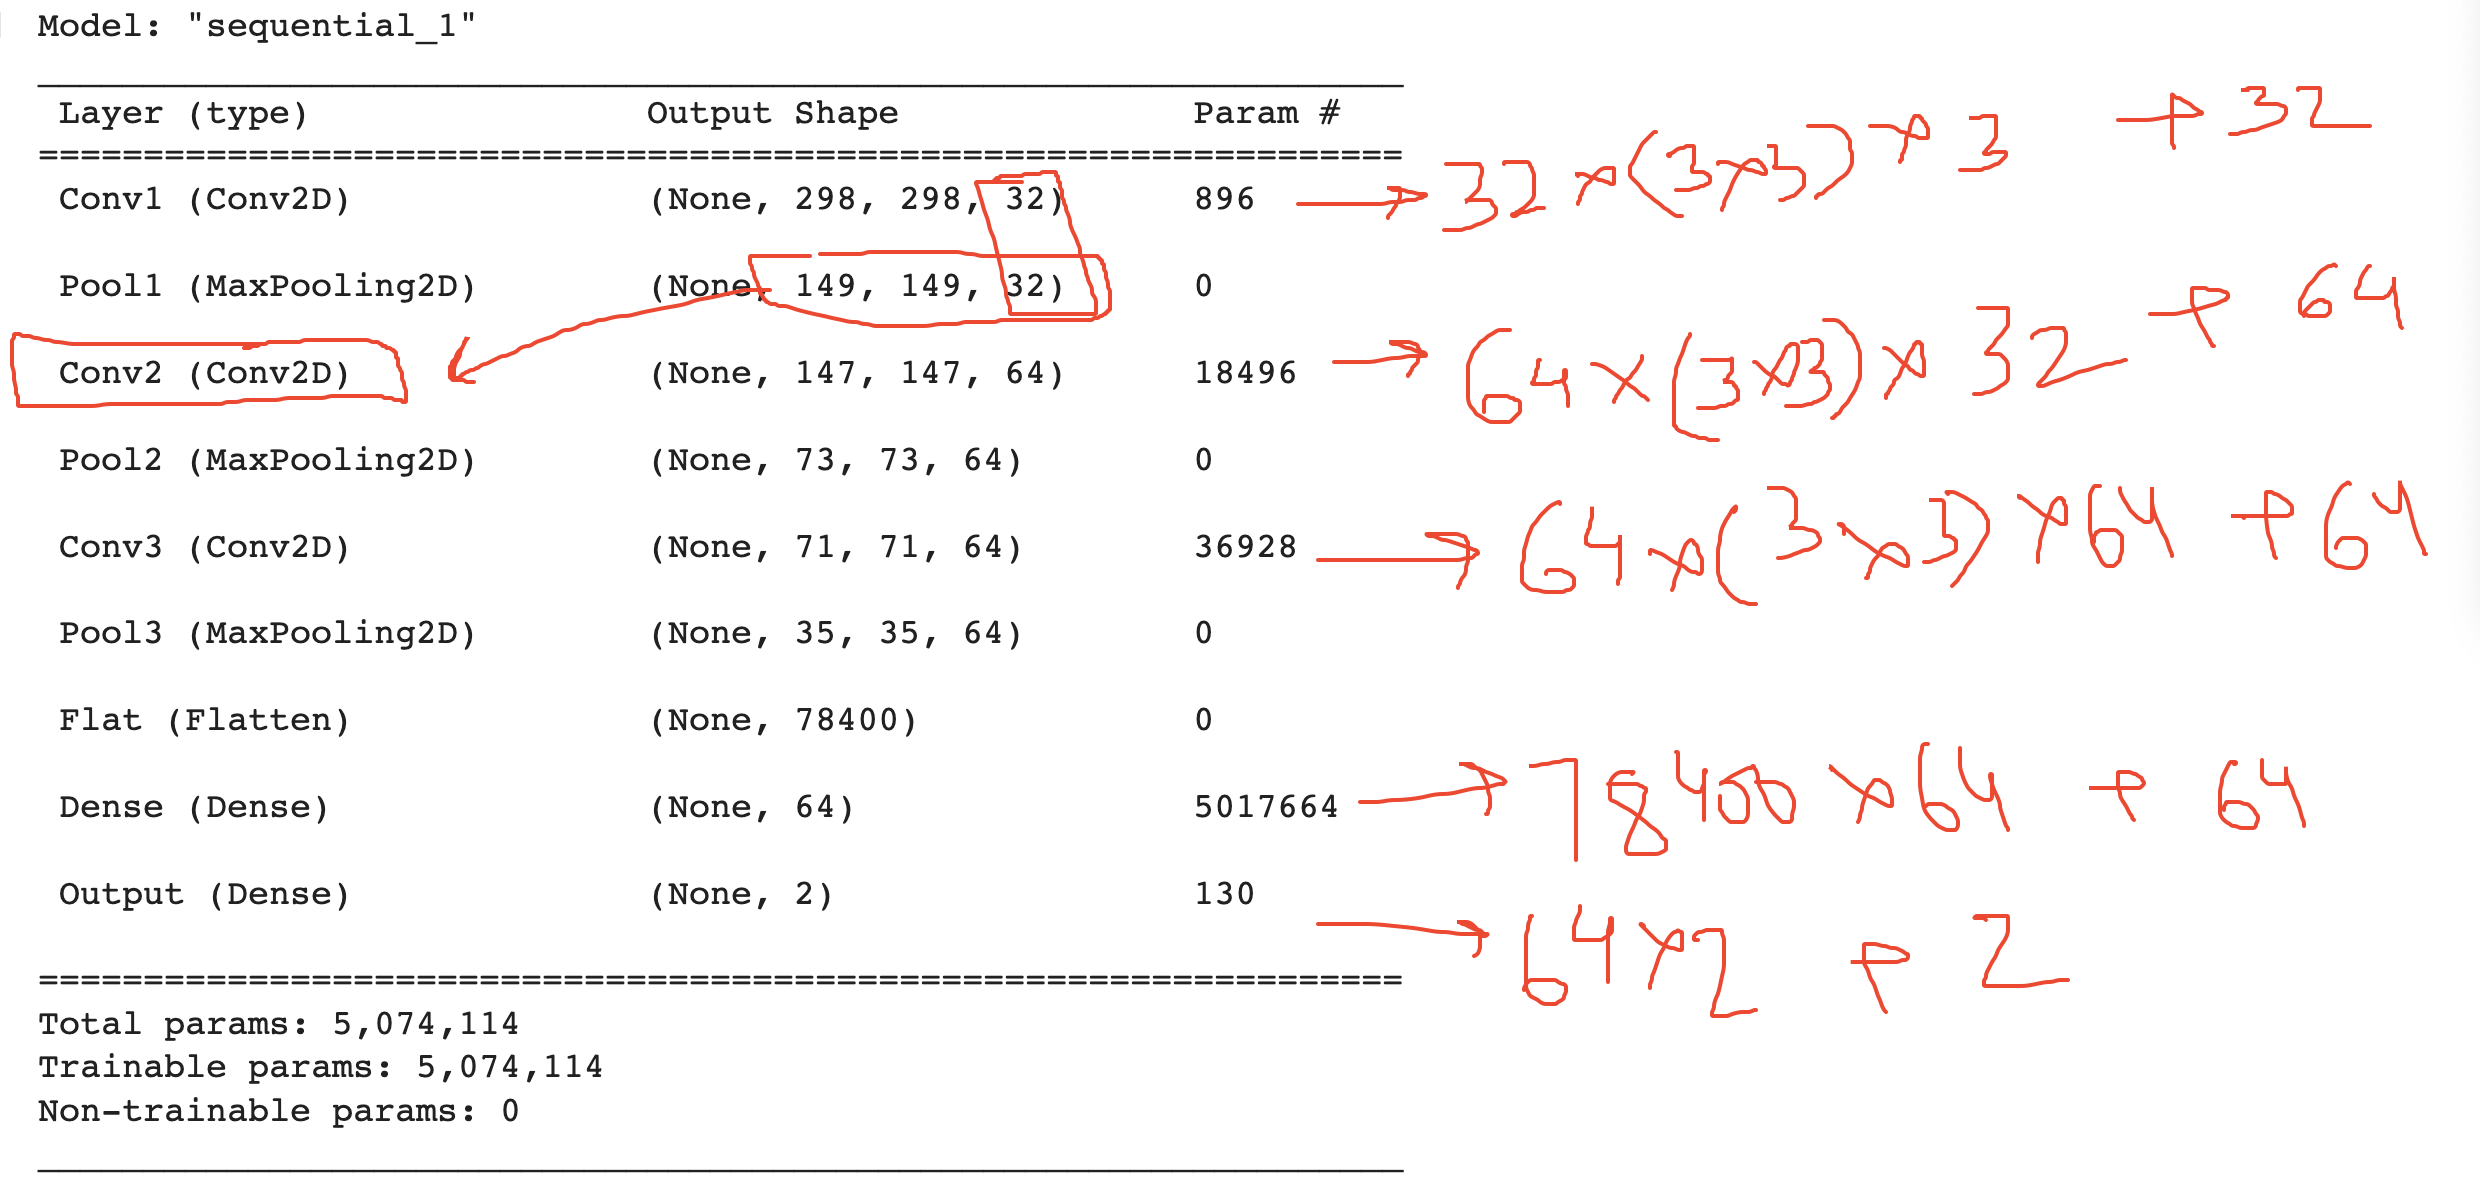

In [ ]:
# Num of filters = 32
# Depth of image = 3
# Value inside a filter = 3x3 = 9
# 32 * 9 * 3
# + bias
# (32*9*3) + 32


# Num of filters = 64
# Depth of image = 32
# Value inside the filters = 3x3 = 9
# 64 * 32 * 9 + 64



In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["acc"])

In [ ]:
model.fit(train_idg, batch_size=batch_size, epochs=15, validation_data=val_idg)

Epoch 1/15
352/352 [==============================] - 164s 430ms/step - loss: 0.6728 - acc: 0.5720 - val_loss: 0.6417 - val_acc: 0.6300
Epoch 2/15
352/352 [==============================] - 141s 400ms/step - loss: 0.6287 - acc: 0.6350 - val_loss: 0.6107 - val_acc: 0.6552
Epoch 3/15
352/352 [==============================] - 149s 422ms/step - loss: 0.5921 - acc: 0.6787 - val_loss: 0.5671 - val_acc: 0.6988
Epoch 4/15
352/352 [==============================] - 155s 439ms/step - loss: 0.5615 - acc: 0.7120 - val_loss: 0.5568 - val_acc: 0.7096
Epoch 5/15
352/352 [==============================] - 141s 400ms/step - loss: 0.5382 - acc: 0.7300 - val_loss: 0.5373 - val_acc: 0.7300
Epoch 6/15
352/352 [==============================] - 148s 420ms/step - loss: 0.5152 - acc: 0.7453 - val_loss: 0.5163 - val_acc: 0.7412
Epoch 7/15
352/352 [==============================] - 140s 398ms/step - loss: 0.4914 - acc: 0.7617 - val_loss: 0.5326 - val_acc: 0.7316
Epoch 8/15
 26/352 [=>..........................

In [ ]:
# GPU -
# Google Colab - Shares a GPU with us for FREE!

# Runtime -> Change Runtime Type --> Hardware (GPU)